In [1]:
!pip install -U imbalanced-learn

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")

In [5]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.tail(20)

,age,sex,bmi,children,smoker,region,charges
1318,35,male,39.710,4,no,northeast,19496.71917
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1321,62,male,26.695,0,yes,northeast,28101.33305
1322,62,male,38.830,0,no,southeast,12981.34570
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470


# Exploratory Data Analysis

In [7]:
# Checking the dimensions of the dataset.
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
# Checking typres of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [14]:
df['charges'].nunique()

1337

<Axes: >

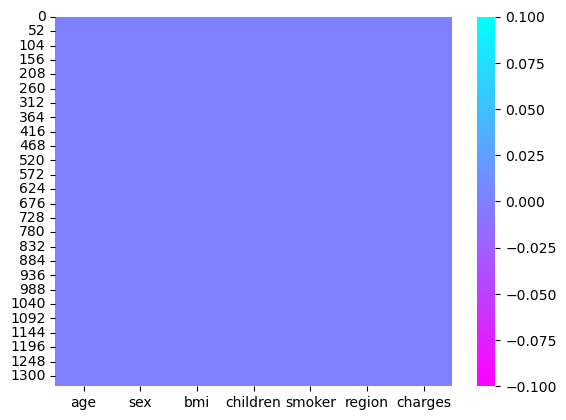

In [15]:
sns.heatmap(df.isnull(), cmap = "cool_r")

In [16]:
# Separating numerical and categorical columns.
# Checking for categorical columns
categorical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_columns.append(i)
print("Categorical Columns: ", categorical_columns)
print("\n")

Categorical Columns:  ['sex', 'smoker', 'region']




In [17]:
numerical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_columns.append(i)
print("Numerical Columns: ", numerical_columns)
print("\n")

Numerical Columns:  ['age', 'bmi', 'children', 'charges']




# Description of Dataset

In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### 1) Count of all columns are same and there are no missing values in the dataset.
##### 2) Mean is greater than median, right skewness is possible.
##### 3) Huge difference between 75% and max can be seen, outliers might be present.

# Data Visualization

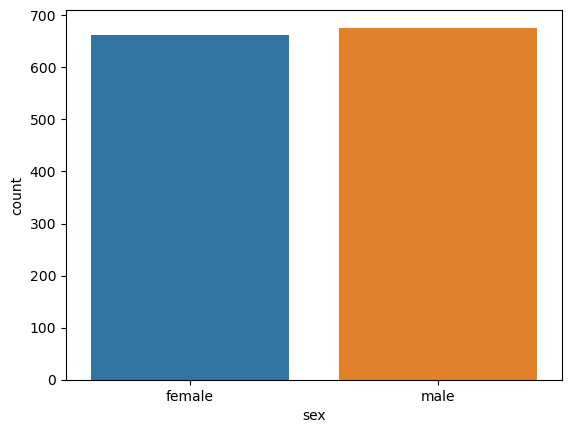

In [19]:
ax = sns.countplot(x = 'sex', data = df)
plt.show()

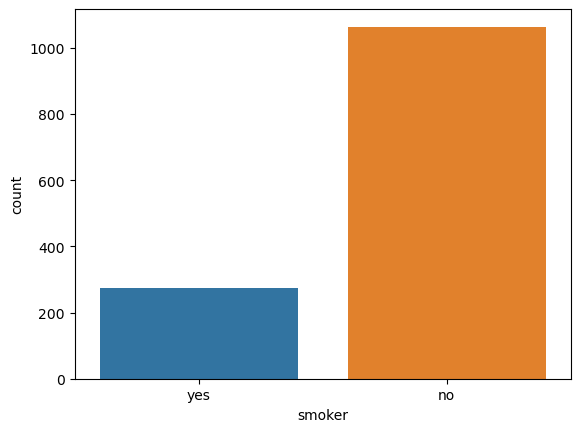

In [20]:
ax = sns.countplot(x = 'smoker', data = df)
plt.show()

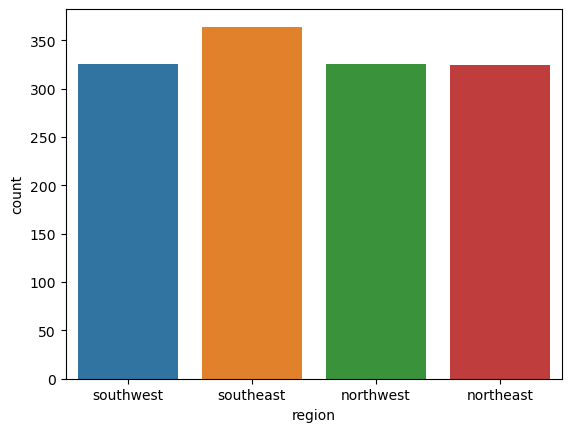

In [21]:
ax = sns.countplot(x = 'region', data = df)
plt.show()

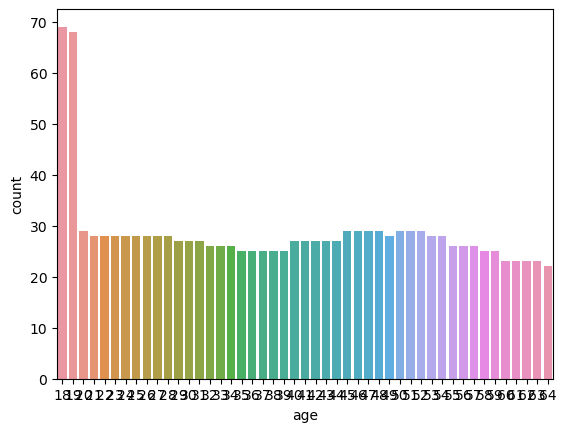

In [22]:
ax = sns.countplot(x = 'age', data = df)
plt.show()

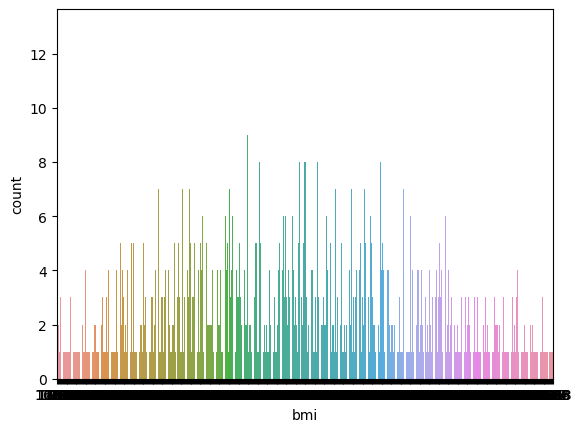

In [23]:
ax = sns.countplot(x = 'bmi', data = df)
plt.show()

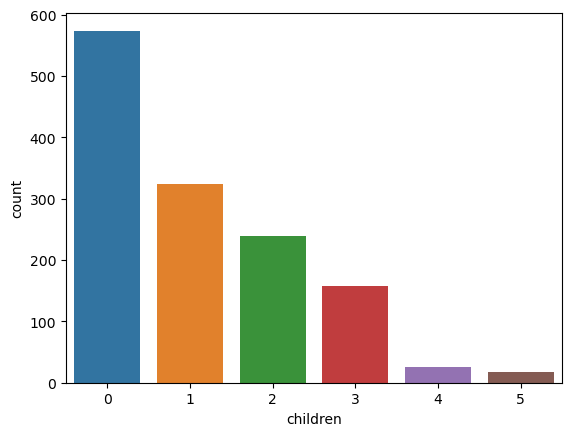

In [24]:
ax = sns.countplot(x = 'children', data = df)
plt.show()

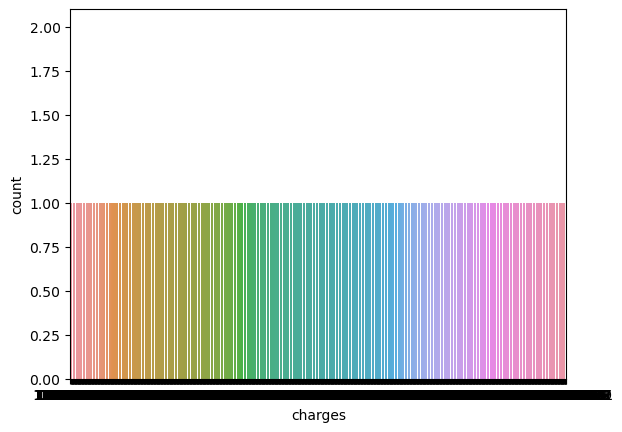

In [25]:
ax = sns.countplot(x = 'charges', data = df)
plt.show()

# Checking for outliers

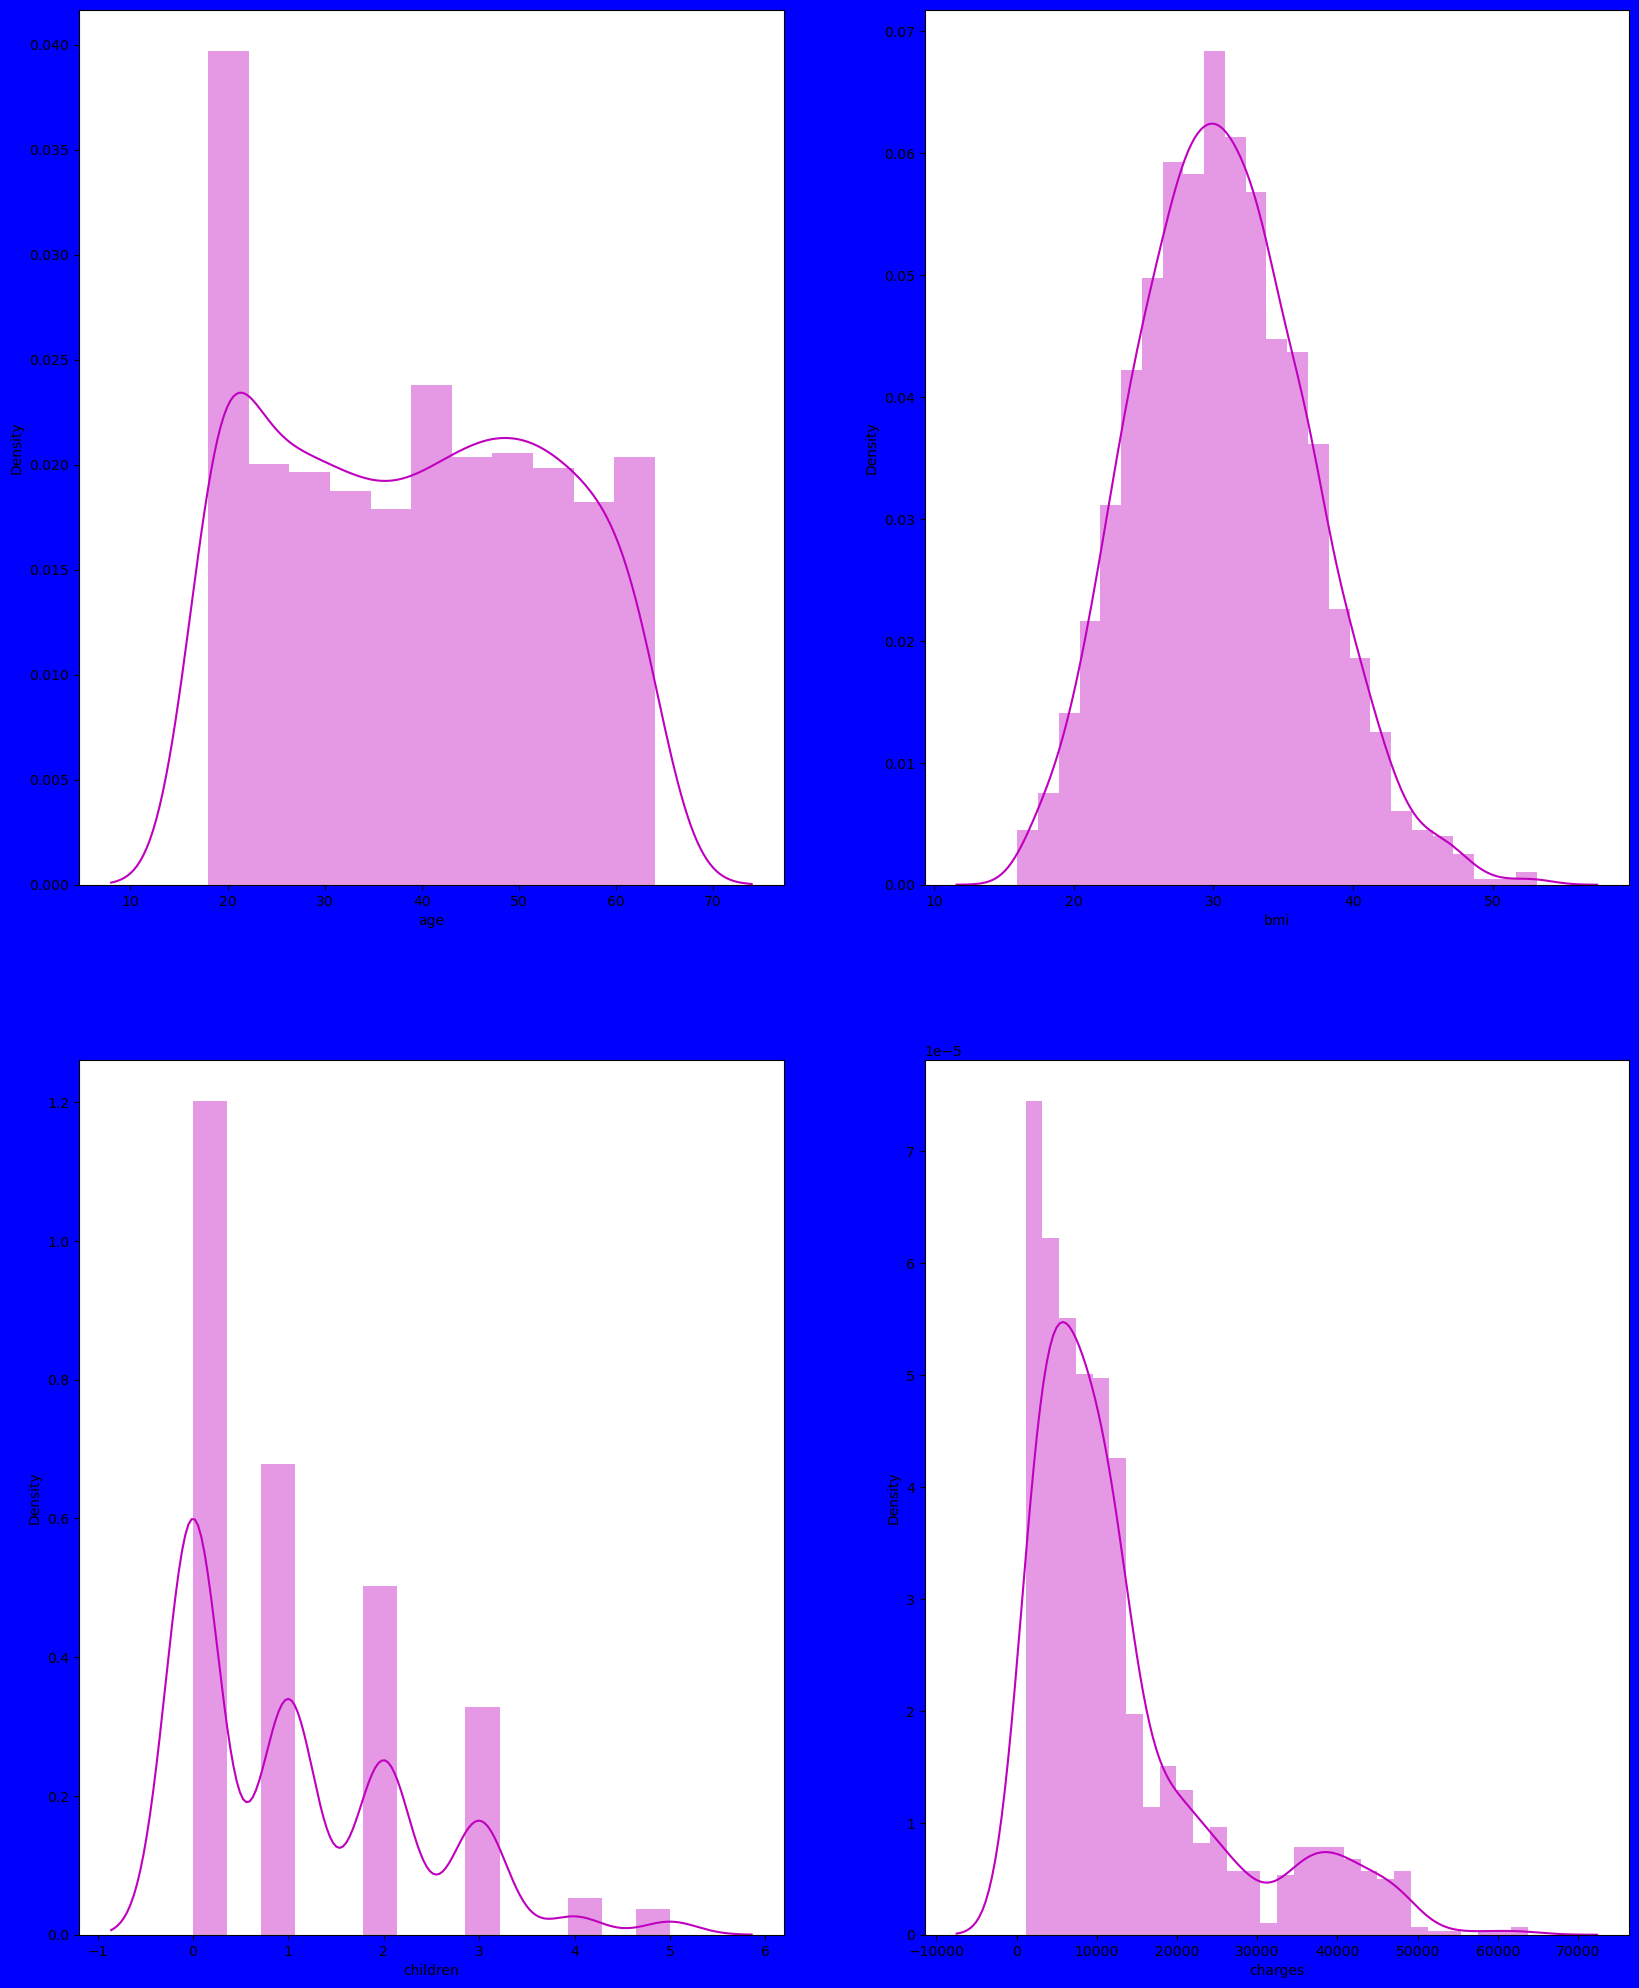

In [26]:
# Let's check how data has been distributed in remaining columns.
plt.figure(figsize = (20, 25), facecolor = 'blue')
plotnumber = 1
for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(df[column], color = 'm')
        plt.xlabel(column, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
plt.show()    

In [27]:
# from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df        

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [28]:
df['charges'] = np.log(df['charges'])

In [29]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges    -0.090098
dtype: float64

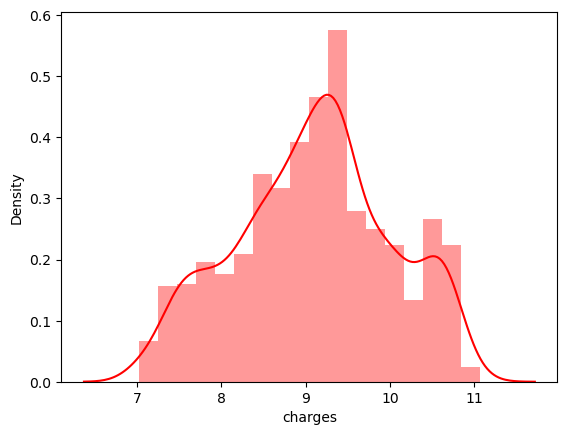

In [30]:
ax = sns.distplot(df['charges'], kde = True, color = 'r')

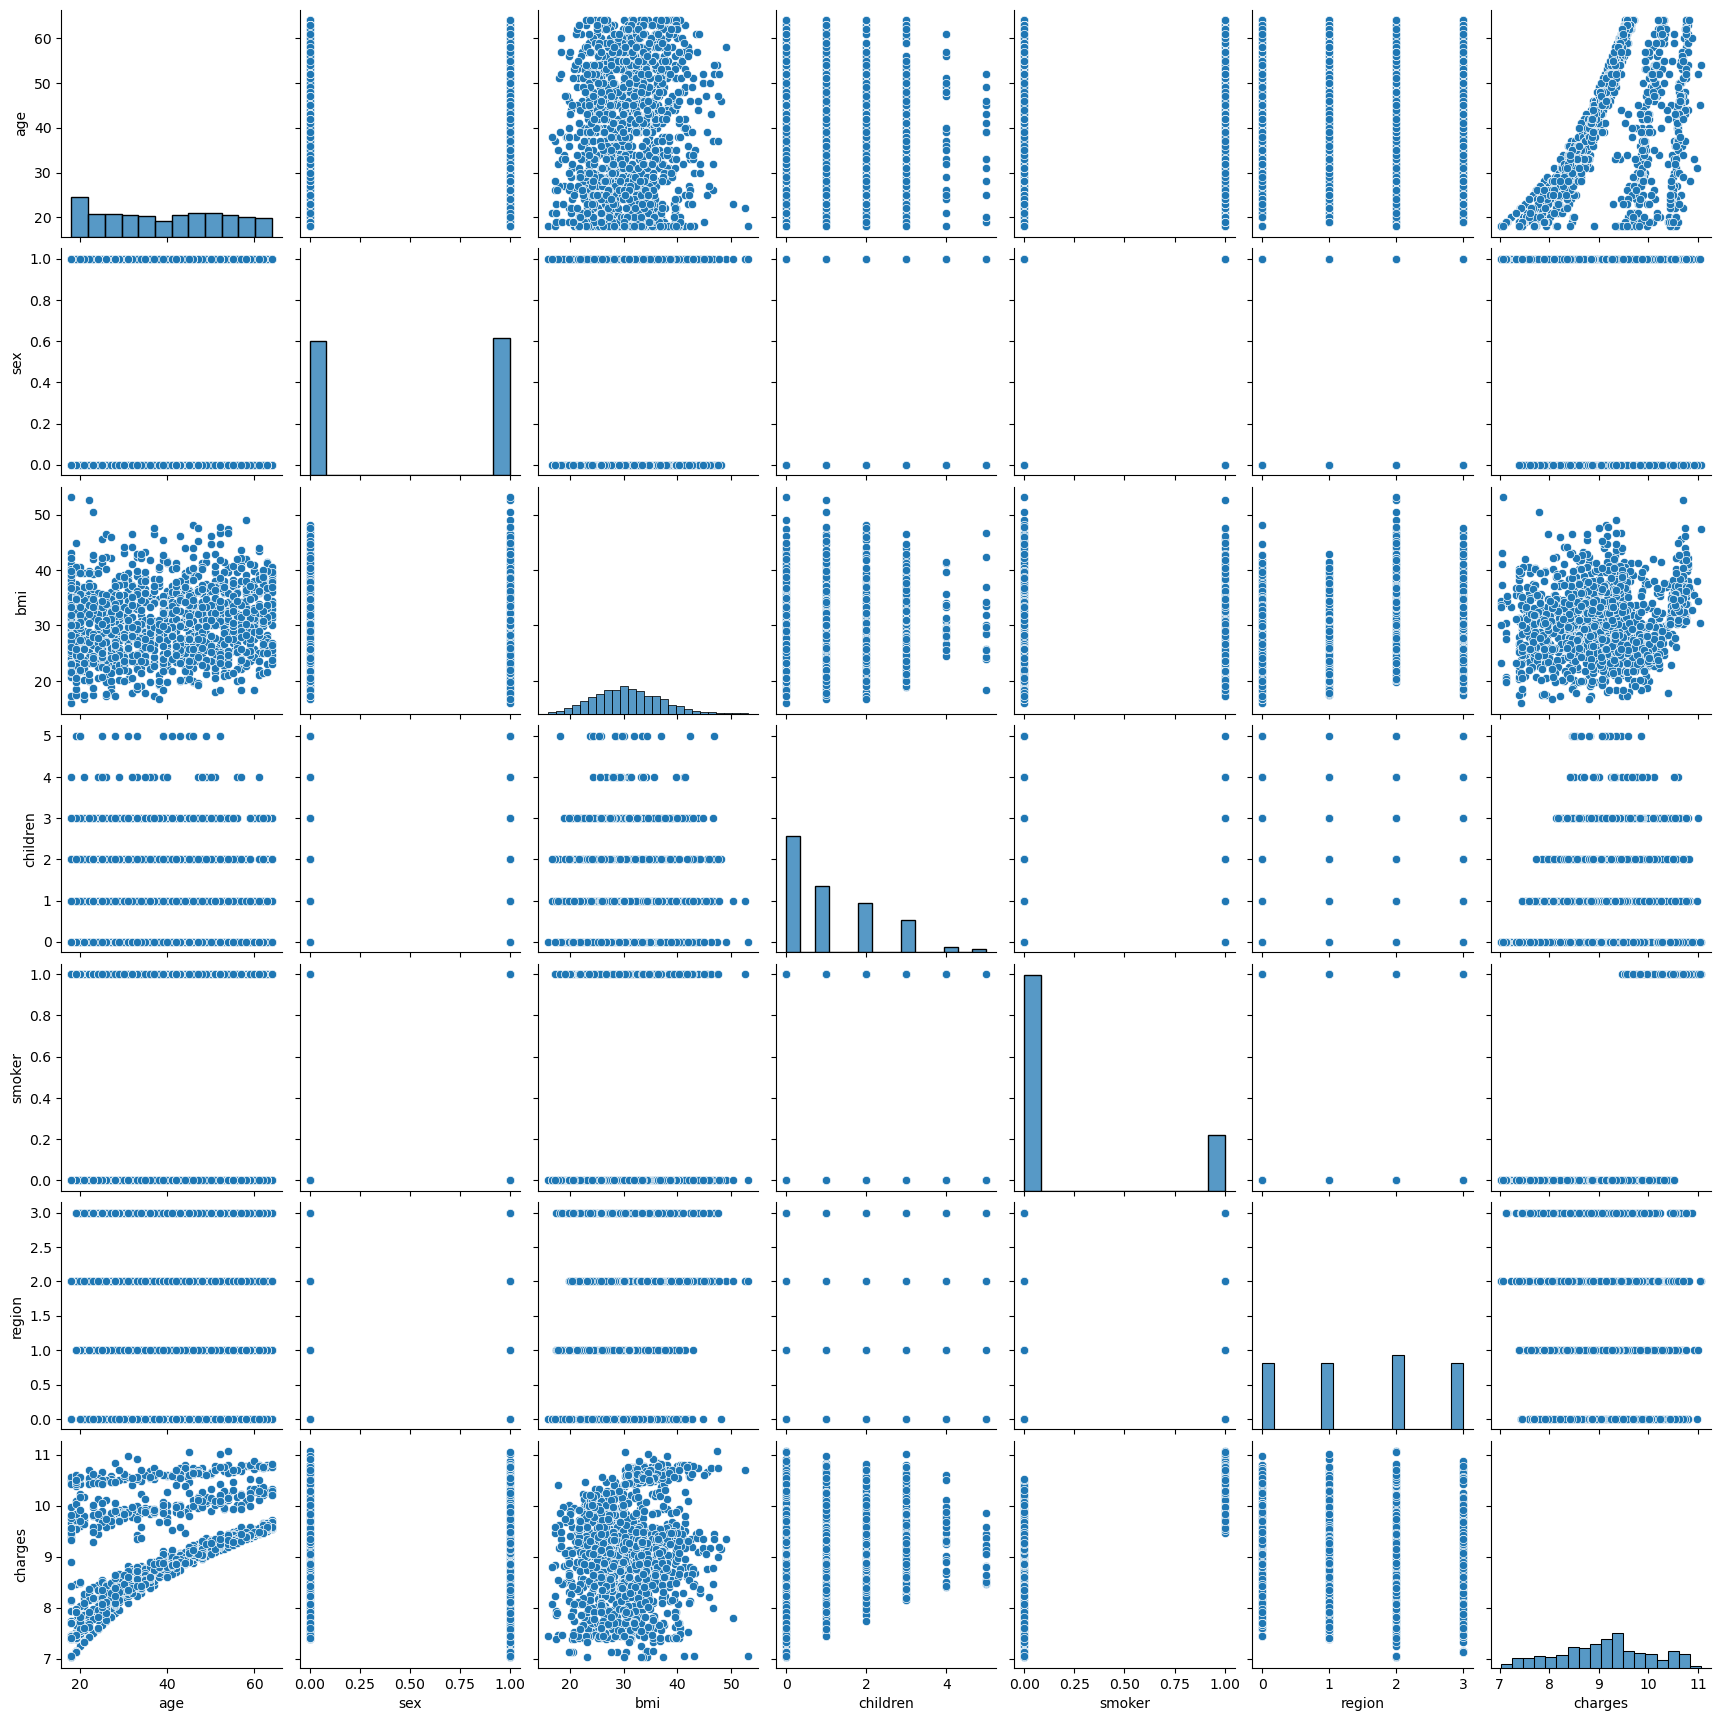

In [31]:
sns.pairplot(df)
plt.show()

In [35]:
# Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold = 3
np.where(z<3)

(array([   0,    0,    0, ..., 1315, 1315, 1315], dtype=int64),
 array([0, 1, 2, ..., 4, 5, 6], dtype=int64))

In [36]:
df=df[(z<3).all(axis = 1)]
df.shape

(1316, 7)

In [34]:
# Dividing dataset into features and label
y = df['charges']
x = df.drop(columns = ['charges'])

# Correlation between Target variable and Independent variable

In [37]:
cor = df.corr()

<Axes: >

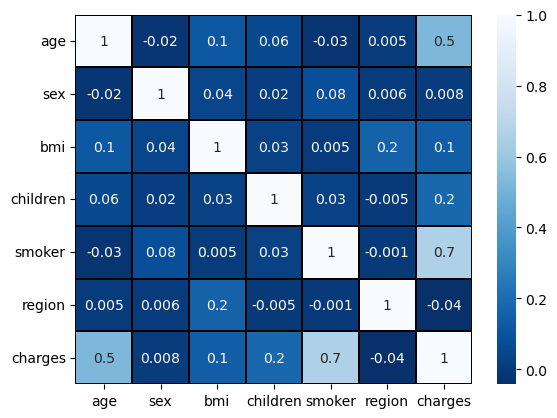

In [38]:
sns.heatmap(df.corr(),linewidth = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")

In [39]:
cor['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.665991
age         0.527653
children    0.179030
bmi         0.142239
sex         0.008390
region     -0.042243
Name: charges, dtype: float64

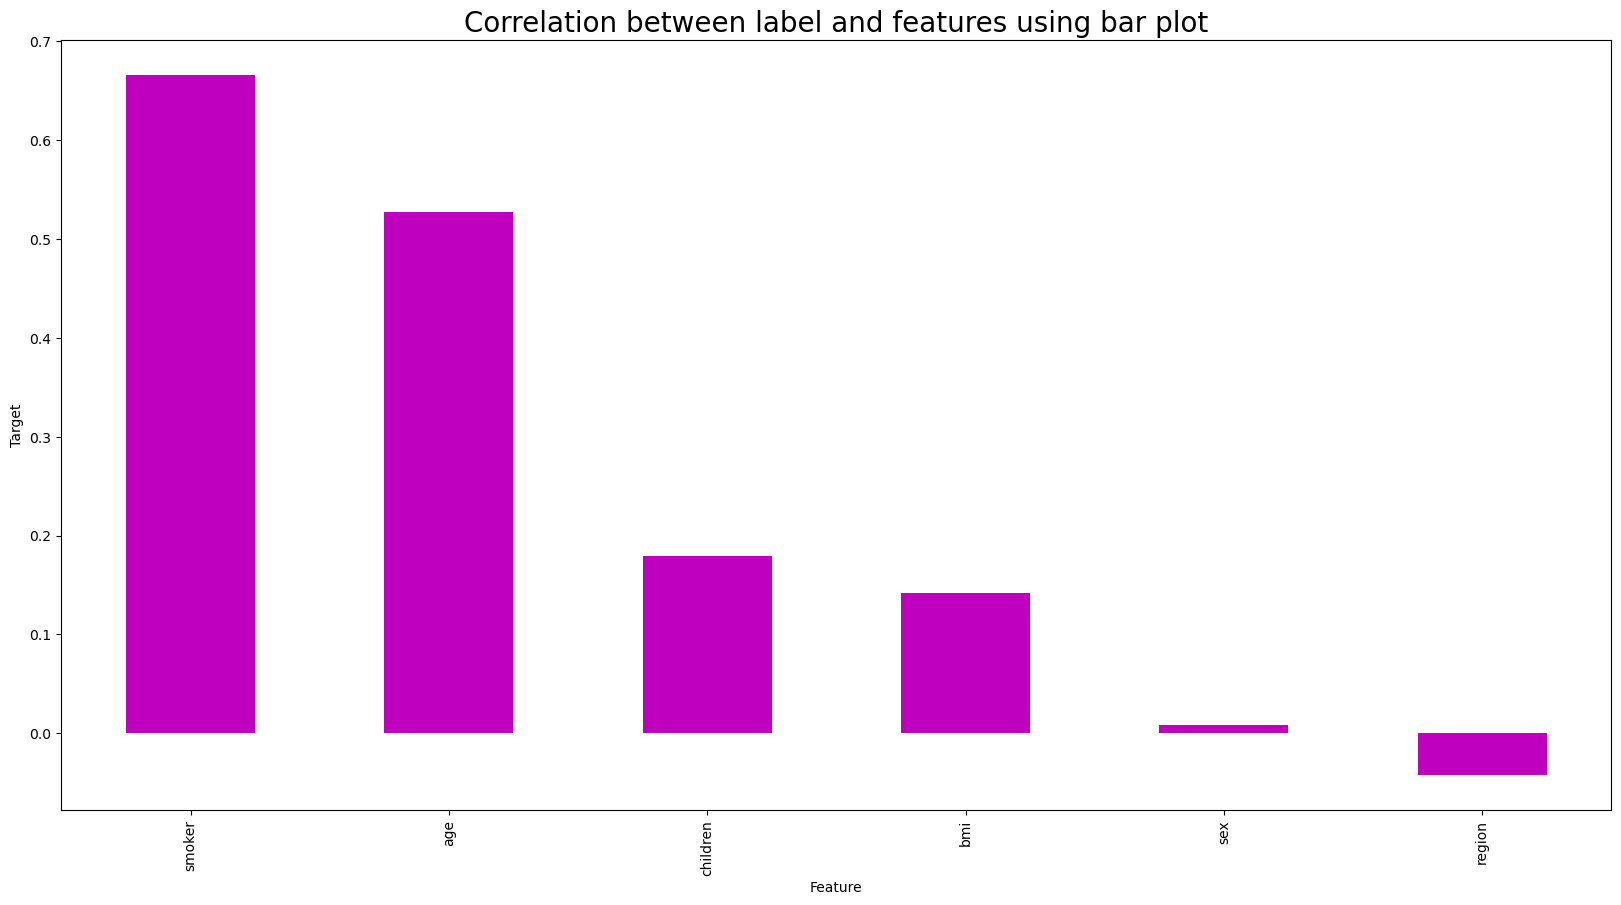

In [42]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize=(20, 10))
df.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind = 'bar', color = 'm')
plt.xlabel('Feature', fontsize = 10)
plt.ylabel('Target', fontsize = 10)
plt.title("Correlation between label and features using bar plot", fontsize = 20)
plt.show()

In [45]:
y.value_counts()

charges
7.402185     2
9.734176     1
9.477607     1
10.696540    1
9.251762     1
            ..
8.901787     1
10.170048    1
10.250189    1
7.046992     1
10.279914    1
Name: count, Length: 1315, dtype: int64

# Feature Scaling using Standard Scalarization

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x_scaled

,age,sex,bmi,children,smoker,region
0,-1.441444,-1.006098,-0.453768,-0.928234,1.959141,1.352089
1,-1.512509,0.993939,0.527239,-0.038536,-0.510428,0.446568
2,-0.801858,0.993939,0.398555,1.740862,-0.510428,0.446568
3,-0.446533,0.993939,-1.321967,-0.928234,-0.510428,-0.458954
4,-0.517598,0.993939,-0.289988,-0.928234,-0.510428,-0.458954
...,...,...,...,...,...,...
1311,0.761574,0.993939,0.059297,1.740862,-0.510428,-0.458954
1312,-1.512509,-1.006098,0.218063,-0.928234,-0.510428,-1.364475
1313,-1.512509,-1.006098,1.041975,-0.928234,-0.510428,0.446568
1314,-1.299314,-1.006098,-0.804724,-0.928234,-0.510428,1.352089


### Checking Variance Inflation Factor

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.018969,age
1,1.008550,sex
2,1.043397,bmi
3,1.004829,children
4,1.007649,smoker
5,1.026415,region


#### All the vif values are less than 5 and are very low, that means no multicollinearity. Now we can go ahead fitting our data to the model. Let's split our data into training and test set.

# Model Building

In [60]:
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random state",maxRS)        
        

Maximum r2 score is  0.8397681133830323 on Random state 11


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=maxRS)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [67]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training data: ',r2_score(y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(y_test, pred_LR))
print("Mean squared error: ",mean_squared_error(y_test, pred_LR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, pred_LR)))


R2_score:  0.8397681133830323
R2_score on training data:  73.97402844106962
Mean Absolute Error:  0.26092323787210464
Mean squared error:  0.14450739677084284
Root Mean Squared Error:  0.3801412852754129


In [68]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RFR))
print('R2_score on training data: ',r2_score(y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(y_test, pred_RFR))
print("Mean squared error: ",mean_squared_error(y_test, pred_RFR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, pred_RFR)))


R2_score:  0.8635478436176923
R2_score on training data:  96.91419544866315
Mean Absolute Error:  0.21561635490657968
Mean squared error:  0.12306131019796125
Root Mean Squared Error:  0.3508009552409475


In [69]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_knn))
print('R2_score on training data: ',r2_score(y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(y_test, pred_knn))
print("Mean squared error: ",mean_squared_error(y_test, pred_knn))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, pred_knn)))


R2_score:  0.8829200786601569
R2_score on training data:  83.54751792005757
Mean Absolute Error:  0.21968535513150067
Mean squared error:  0.10559018560019973
Root Mean Squared Error:  0.3249464349707498


In [76]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred_DTR = DTR.predict(x_test)
pred_train = DTR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_DTR))
print('R2_score on training data: ',r2_score(y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(y_test, pred_DTR))
print("Mean squared error: ",mean_squared_error(y_test, pred_DTR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, pred_DTR)))


R2_score:  0.6010702939056234
R2_score on training data:  100.0
Mean Absolute Error:  0.2819471419941229
Mean squared error:  0.3597804066306932
Root Mean Squared Error:  0.5998169776112487


In [71]:
from sklearn.linear_model import Lasso,Ridge

In [73]:
rd = Ridge()
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_rd))
print('R2_score on training data: ',r2_score(y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(y_test, pred_rd))
print("Mean squared error: ",mean_squared_error(y_test, pred_rd))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, pred_rd)))


R2_score:  0.8396084060894028
R2_score on training data:  73.97395171207253
Mean Absolute Error:  0.2611405005412533
Mean squared error:  0.1446514310559966
Root Mean Squared Error:  0.38033068645061574


In [77]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_etr))
print('R2_score on training data: ',r2_score(y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(y_test, pred_etr))
print("Mean squared error: ",mean_squared_error(y_test, pred_etr))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, pred_etr)))


R2_score:  0.8238715304670785
R2_score on training data:  100.0
Mean Absolute Error:  0.20537369448659443
Mean squared error:  0.15884395526264727
Root Mean Squared Error:  0.3985523243724057


In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
score = cross_val_score(LR,x_scaled,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(y_test,pred_LR) - score.mean())*100)

[0.79695725 0.6879537  0.83213472 0.76538498 0.735755  ]
0.7636371302746746
Difference between R2 score and cross validation score is-  7.613098310835764


In [85]:
score1 = cross_val_score(RFR,x_scaled,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(y_test,pred_RFR) - score.mean())*100)

[0.85065061 0.70050768 0.85657786 0.81447146 0.79408727]
0.8032589759891724
Difference between R2 score and cross validation score is-  5.908672753672784


In [86]:
score2 = cross_val_score(knn,x_scaled,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(y_test,pred_knn) - score.mean())*100)

[0.84907092 0.69748156 0.84709273 0.81207989 0.79081853]
0.7993087271341052
Difference between R2 score and cross validation score is-  7.845896257919238


In [87]:
score3 = cross_val_score(DTR,x_scaled,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(y_test,pred_DTR) - score.mean())*100)

[0.74487236 0.5758522  0.61345611 0.71289701 0.53374348]
0.636164232271064
Difference between R2 score and cross validation score is-  -20.33908221753411


In [88]:
score4 = cross_val_score(rd,x_scaled,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(y_test,pred_rd) - score.mean())*100)

[0.79691437 0.68807639 0.83198991 0.76542599 0.73579464]
0.7636402616416333
Difference between R2 score and cross validation score is-  3.5147290008438303


###### Random Forest and Linear Regression appear to be the best models among the above, with Random Forest having a slightly higher R2 score on the testing data. Random forest is the best performing model.

# Hyperparameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators': [13, 15],
         'criterion'}

In [92]:
grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid={'max_depth': range(3,7),'n_estimators': (10, 50, 100, 1000),},
                    cv=5,scoring='neg_mean_squared_error',verbose=0,n_jobs=-1)
    
grid.fit(x_scaled,y)

best_params = grid.best_params_
best_params

{'max_depth': 5, 'n_estimators': 1000}

In [93]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 7),
                         'n_estimators': (10, 50, 100, 1000)},
             scoring='neg_mean_squared_error')

In [100]:
model = RandomForestRegressor(max_depth=5, n_estimators=1000)

In [101]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000)

In [102]:
pred = model.predict(x_test)
print('R2 score: ',r2_score(y_test, pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test, pred))
print("Mean squared error: ",mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, pred)))

R2 score:  0.9080360042459095
Mean Absolute Error:  0.1847146951247597
Mean squared error:  0.08293903232155524
Root Mean Squared Error:  0.28799137542911807


In [103]:
import joblib

In [104]:
import pickle
filename= 'Medical cost Personal Insurance.pkl'
pickle.dump(model, open(filename, 'wb'))

In [106]:
import pickle
loaded_model =pickle.load(open('Medical cost Personal Insurance.pkl','rb'))
Result = loaded_model.score(x_test, y_test)
print(Result*100)                          

90.80360042459094


In [107]:
Final_result=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Final_result

,0,1,2,3,4,5,6,7,8,9,...,319,320,321,322,323,324,325,326,327,328
Predicted,9.643685,10.680185,8.856689,8.805218,7.733694,7.606750,8.264097,8.950105,8.800323,10.749061,...,10.746606,7.643842,9.562434,9.210259,8.806197,10.171284,8.668222,9.040234,9.563907,9.138086
Original,9.615034,10.658680,8.816815,8.597050,7.666176,7.035216,7.516043,8.155324,8.772744,10.759084,...,11.063045,7.584276,9.535665,9.097276,8.887903,10.060547,8.517963,8.900787,9.506818,9.115488
